# Per Relation ZSRE Breakdown

This notebook visualizes the difference in $F_1$ performance between supervised QA models and reflex

In [57]:
import pickle
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('../reflexzsre.json') as rf, open('fixed_reflexzsre.json', 'w') as wf:
    # the file might be formatted wrong
    for l in rf.readlines():
        l = l.strip()
        if ':' in l:
            left, right = l.split(':')
            left = left.strip()
            right = right.strip()
            wf.write(f'"{left}":{right}')
            continue
        wf.write(l)

with open('fixed_reflexzsre.json') as wf:
    obj = json.load(wf)

In [3]:
reflex_per_relation = obj['per_relation_metrics']

In [4]:
with open('../BERTSQUADZSRE.pkl', 'rb') as rf:
    
    squad_per_relation = pickle.load(rf)

In [5]:
with open('../BERTZSREZSRE.pkl', 'rb') as rf:
    
    zsre_per_relation = pickle.load(rf)

In [79]:
def get_rel_name(dataset, rel):
    with open(f'../data/{dataset}/{rel}.jsonl') as rf:
        for l in rf:
            l = l.strip()
            obj = json.loads(l)
            return obj['label']

In [85]:
s_dict = []
z_dict = []
for rel in reflex_per_relation:
    rf1 = reflex_per_relation[rel]['f1'] * 100
    sf1 = squad_per_relation[rel]['f1'] * 100
    zf1 = zsre_per_relation[rel]['f1'] * 100
    delta_s = rf1 - sf1
    delta_z = rf1 - zf1
    if delta_s > 0:
        rname = get_rel_name('zsre/test', rel)
        print(rname)
#     if delta_z < 0:
#         rname = get_rel_name('zsre/test', rel)
#         print(rname)
    #if delta_z > 0:
    #    print(rel)
    s_dict.append(delta_s)
    z_dict.append(delta_z)

convicted of
country
taxon rank
manner of death
continent
product
found in taxon
start time
country of citizenship
canonization status
instrumentation


In [25]:
ser = pd.Series(s_dict)
zer = pd.Series(z_dict)

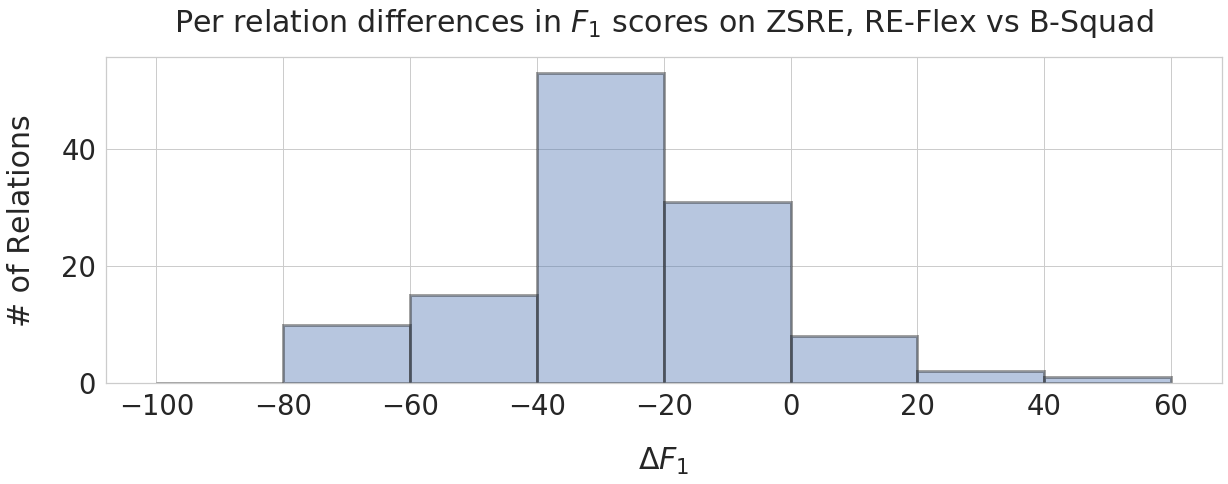

In [71]:
plt.figure(figsize=(20,6))
sns.set(style='whitegrid', font_scale=2.5)
#order = ['No overlap', 'Longer by 1', 'Longer by 2', 'Longer by 3', 'Longer by 4 or more']
ax = sns.distplot(ser, bins=[-100, -80, -60, -40, -20, 0, 20, 40, 60], kde=False, axlabel='$\Delta F_1$', hist_kws=dict(edgecolor="k", linewidth=3))
ax.set_title('Per relation differences in $F_1$ scores on ZSRE, RE-Flex vs B-Squad', pad=25)
ax.set(ylabel='# of Relations')
#ax.axlabel('test')
ax.yaxis.labelpad = 25
ax.xaxis.labelpad = 25
#plt.setp(ax.get_legend().get_texts(), fontsize='20')
#plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
plt.savefig('reflex_bsquad.png', bbox_inches='tight')

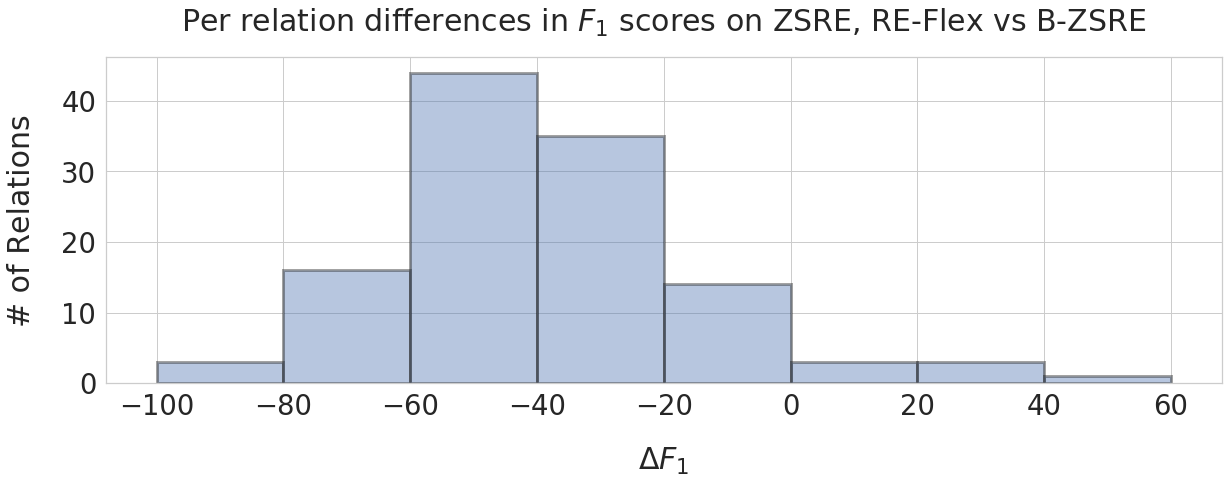

In [73]:
plt.figure(figsize=(20,6))
sns.set(style='whitegrid', font_scale=2.5)
#order = ['No overlap', 'Longer by 1', 'Longer by 2', 'Longer by 3', 'Longer by 4 or more']
ax = sns.distplot(zer, bins=[-100, -80, -60, -40, -20, 0, 20, 40, 60], kde=False, axlabel='$\Delta F_1$', hist_kws=dict(edgecolor="k", linewidth=3))
ax.set_title('Per relation differences in $F_1$ scores on ZSRE, RE-Flex vs B-ZSRE', pad=25)
ax.set(ylabel='# of Relations')
#ax.axlabel('test')
ax.yaxis.labelpad = 25
ax.xaxis.labelpad = 25
#plt.setp(ax.get_legend().get_texts(), fontsize='20')
#plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
plt.savefig('reflex_bzsre.png', bbox_inches='tight')

In [60]:
h = np.histogram(zer, bins=[-100, -80, -60, -40, -20, 0, 20, 40, 60])
h

(array([ 3, 16, 44, 35, 14,  3,  3,  1]),
 array([-100,  -80,  -60,  -40,  -20,    0,   20,   40,   60]))

In [62]:
k = np.histogram(ser, bins=[-100, -80, -60, -40, -20, 0, 20, 40, 60])
k

(array([ 0, 10, 15, 53, 31,  8,  2,  1]),
 array([-100,  -80,  -60,  -40,  -20,    0,   20,   40,   60]))

In [63]:
better_than_z = 7/120
better_than_z

0.058333333333333334

In [65]:
better_than_s = 11/120
better_than_s

0.09166666666666666

In [67]:
within_20_z = 14/120
within_20_z

0.11666666666666667

In [68]:
within_20_s = 31 / 120
within_20_s

0.25833333333333336